In [1]:
import numpy as np
import src.BackusGilbert as BGpy
import src.GaussianBackusGilbert as GBGpy
import src.ConjugateGradient as CGpy
import src.SteepestDescent as SDpy
import src.MEMBryan as MEMBpy
import src.Tikhonov as TIKpy
import matplotlib.pyplot as plt

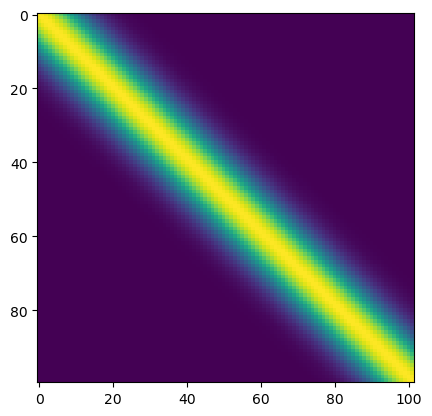

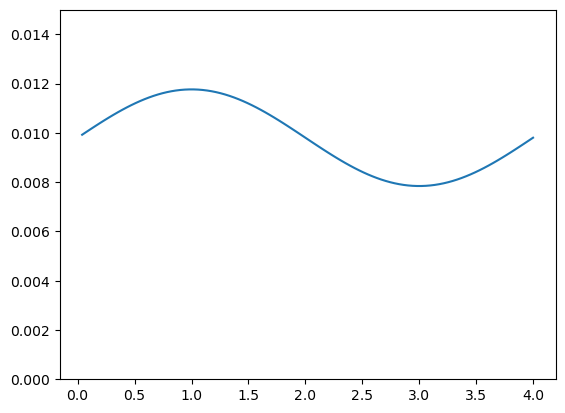

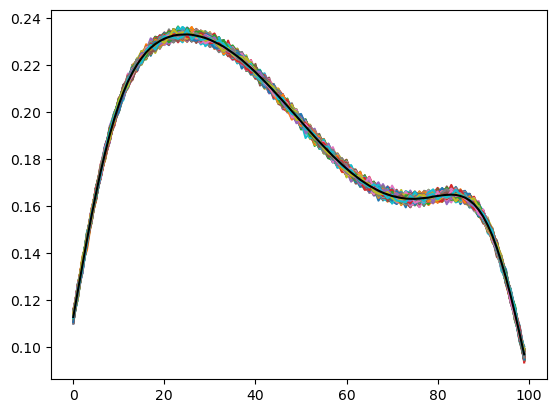

In [2]:
# Specify discretization
Nomega = 102; Ntau = 100;
omegas = np.linspace(4./Nomega, 4, Nomega) 
taus = np.linspace(4./Ntau, 4, Ntau)

# Construct Signal
x = 5 + np.sin( np.pi / 2 * omegas )
x /= np.sum(x)

# Construct Gaussian Kernel
beta=10
EE, TT = np.meshgrid(omegas, taus)
A=TT-EE 
for i in range(Ntau):
    for j in range (Nomega):
        A[i,j]= np.exp( -beta/2. * A[i,j]**2 )

plt.imshow(A)
# Construct Data so that data[0] contains the 0^th sample, [Nsamples, Ntau]=shape(data)
Nsamples=1000
data = np.tile( A @ x,(Nsamples,1))
stdev = 1e-3
for i in range(Nsamples):
    noise = np.random.normal(np.zeros((Ntau,)), stdev) 
    data[i] += noise

#C = (data-data_avg).T @ (data-data_avg)
b = np.average(data,axis=0)
C = np.diag( np.std(data, axis=0)**2 )

#np.savez('Gaussian_testproblem', A=A, x=x, b=b, C=C, data=data, taus=taus, omegas=omegas)    # .npy extension is added if not given
#npz = np.load('Gaussian_testproblem.npz', allow_pickle=True)
#data=npz['data'];
#A=npz['A']; x0=npz['x0']; b=npz['b']; C=npz['C']; taus=npz['taus']; omegas=npz['omegas'];

plt.figure()
plt.plot(omegas, x)
plt.ylim([0,.015])

plt.figure()
plt.plot(data.T)
plt.plot(b, color='black')

In [3]:
x_CG, err_list = CGpy.CG_solve(A, b, C, tol=1e-6, cond_upperbound=1e11)
x_SD, err_list = SDpy.SD_solve(A, b, C, tol=1e-1, cond_upperbound=1e11)
x_BGM, qlist_BGM, obj_list_BGM = BGpy.BGM_solve_test(A, b, C, omegas ) # TO DO: Implement Smoothened BGM to set lam parameter
x_GBGM, glist_GBGM, obj_list_GBGM, smearing_list_GBGM = GBGpy.GaussianBGM_solve(A, b, C, omegas, taus, sigma=.1)
mu = np.ones((Nomega,1))/Nomega
x_MEMB, x_MEMB_var, MEMB_proposedsolutions, MEMB_P, MEMB_acceptance_arr = MEMBpy.MEMBryan_solve(A, b, C, mu, alpha_min=1e-3, alpha_max=1e4)


C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\ConjugateGradient.py:42: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  A = U[:,0:rank] @ diag(S[0:rank]) @ V[:,0:rank].T
C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\ConjugateGradient.py:42: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  A = U[:,0:rank] @ diag(S[0:rank]) @ V[:,0:rank].T
C:\Users\TC-ROG\anaconda3\envs\tf\lib\site-packages\numba\core\typing\npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  warnings.warn(NumbaPerformanceWarning(msg))
C:\Users\TC-ROG\anaconda3\envs\tf\lib\site-packages\numba\core\typing\npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  warnings

Pre-conditioning matrix to cond(A)= 100000000000.0
CG failed to converge, ended with ||Ax-b||^2_C= [[0.07213032]]


C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\SteepestDescent.py:48: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  A = U[:,0:rank] @ diag(S[0:rank]) @ V[:,0:rank].T
C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\SteepestDescent.py:48: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  A = U[:,0:rank] @ diag(S[0:rank]) @ V[:,0:rank].T
C:\Users\TC-ROG\anaconda3\envs\tf\lib\site-packages\numba\core\typing\npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  warnings.warn(NumbaPerformanceWarning(msg))
C:\Users\TC-ROG\anaconda3\envs\tf\lib\site-packages\numba\core\typing\npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  warnings.war

Pre-conditioning matrix to cond(A)= 100000000000.0
SD failed to converge, ended with ||Ax-b||^@_C= [[0.48225099]]


C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\MEMBryan.py:110: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  x = mu*exp(U @ y); # eqn (3.29) x = m * exp(a) & eqn (3.33) a = Uy
C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\MEMBryan.py:60: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  M = S @ V.T @ (eigvals_inv_matrix) @ V @ S
C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\MEMBryan.py:63: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  err_list=[ chi_sq(Arot, brot, eigvals_inv_matrix, mu, U, y) ];
C:\Users\TC-ROG\Desktop\Hector\Research\AnalyticContinuation_authors\src\MEMBryan.py:63: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 

Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-conditioning A in the primal alg so that kappa< 10000000000.0
Pre-condit

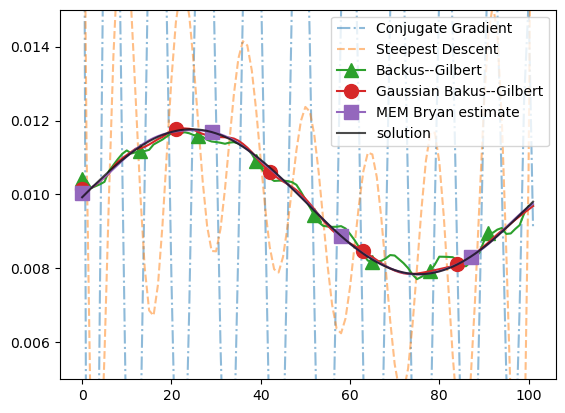

In [5]:
plt.figure()
#for x in MEMB_proposedsolutions:
#    plt.plot(x, alpha=.1, c='black')
plt.plot(x_CG, ls='-.', alpha=.5, label='Conjugate Gradient')
plt.plot(x_SD, ls='--', alpha=.5, label='Steepest Descent')
plt.plot(x_BGM, marker='^', markevery=13, ms=10, label='Backus--Gilbert')
plt.plot(x_GBGM, marker='o', markevery=21, ms=10, label='Gaussian Bakus--Gilbert')
plt.plot(x_MEMB, marker='s', markevery=29, ms=10, label='MEM Bryan estimate')
plt.plot(x, color='black', alpha=.7, label='solution')
plt.ylim([0.005,0.015])
plt.legend()

len Nomega? 102
0.8861278443277583 0.9999999999999979
1.0 0.9999999999999891
0.9999999999999999 1.0000000000000133
1.0000000000000002 0.9999999999999909


Text(0.5, 0, 'regularization param $\\lambda$')

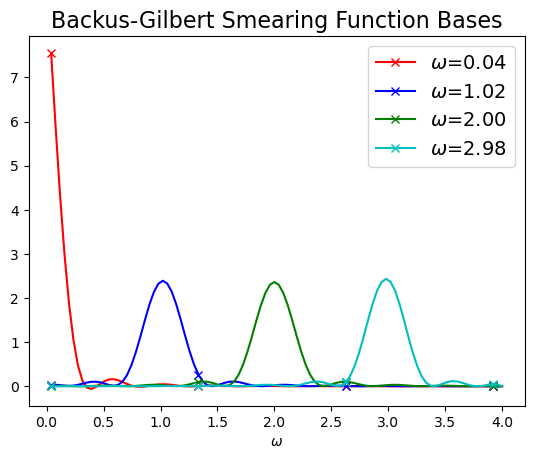

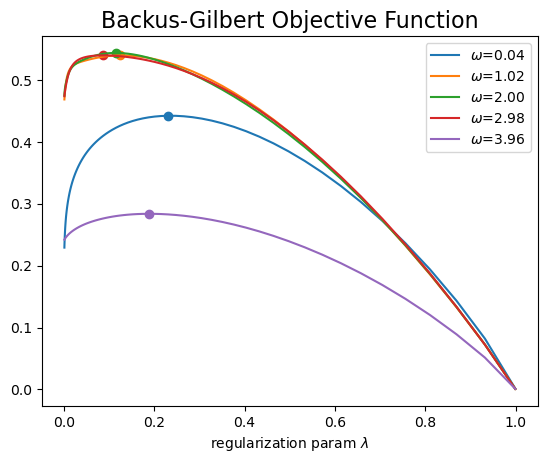

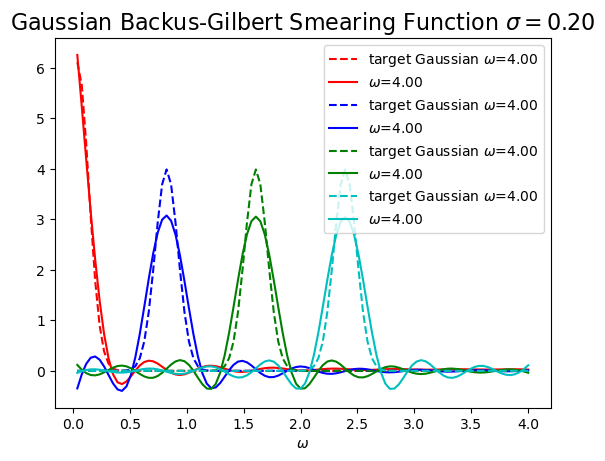

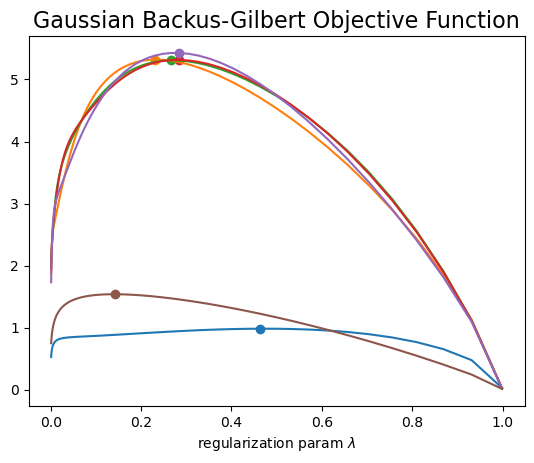

In [6]:
# ---------------------------- #
#  Backus-Gilbert Diagnostics  #
# ---------------------------- #
plt.figure()
plt.title(r"Backus-Gilbert Smearing Function Bases",  fontsize=16)
step=len(qlist_BGM)//4
print("len Nomega?", len(qlist_BGM))
dw = omegas[1] - omegas[0]
for index, q, c in zip( range(0,Nomega,step), qlist_BGM[::step], ['r','b','g','c'] ):
    plt.plot( omegas, (q.T@A)[0], c=c, marker='x', markevery=33, label="$\omega$=%.2f"%omegas[index])
plt.xlabel("$\omega$")
plt.legend(fontsize=14)

plt.figure()
plt.title(r"Backus-Gilbert Objective Function",  fontsize=16)
lams = 10**np.linspace(np.log10(1e-3), np.log10(.999), 100)
for index, objfxn in enumerate(obj_list_BGM):
    if(index % step==0):
        plt.plot(lams, objfxn, label='$\omega$=%.2f'%omegas[index])
        plt.scatter(lams[np.argmax(objfxn)], np.max(objfxn))
plt.legend()
plt.xlabel('regularization param $\lambda$')


plt.figure()
plt.title(r"Gaussian Backus-Gilbert Smearing Function $\sigma=0.20$",  fontsize=16)
step=len(glist_GBGM)//5
dw = omegas[1] - omegas[0]
for smear, g, c in zip(smearing_list_GBGM[::step], glist_GBGM[::step], ['r','b','g','c'] ):
    print(dw*np.sum(smear), dw*np.sum( (g.T@A)[0] ))
    plt.plot( omegas, smear, c=c, ls='--', markevery=55, label='target Gaussian $\omega$=%.2f'%omegas[index])
    plt.plot( omegas, (g.T@A)[0], c=c, markevery=33, label="$\omega$=%.2f"%omegas[index])
plt.legend(fontsize=10)
plt.xlabel("$\omega$")

plt.figure()
plt.title(r"Gaussian Backus-Gilbert Objective Function",  fontsize=16)
for index, objfxn in enumerate(obj_list_GBGM):
    if(index % step==0):
        plt.plot(lams, objfxn, label='$\omega$=%.2f'%omegas[index])
        plt.scatter(lams[np.argmax(objfxn)], np.max(objfxn))
plt.xlabel('regularization param $\lambda$')


In [7]:
# -------------------------------- #
#  MEM with Bryan Alg Diagnostics  #
# -------------------------------- #
print(MEMB_P)

plt.figure()
plt.plot(x, color='black', alpha=.7,  marker='o', markevery=17, label='solution')
for index, x in enumerate(MEMB_proposedsolutions):
    if( MEMB_acceptance_arr[index] ):
        plt.plot(x, alpha=.7, c='cyan', label="%.2e"%MEMB_P[index,0])
    else:
        plt.plot(x, alpha=.1, c='black', label="%.2e"%MEMB_P[index,0])
#plt.plot(x_MEMB, marker='s', markevery=29, ms=10, label='MEM Bryan estimate')
plt.ylim([0.005,0.015])
plt.legend(fontsize=7)


plt.figure()
for P, label, color, marker in zip([MEMB_P],
                           [r"Bryan $P(\alpha| b, \mu )$"],
                           ['blue'],
                           ['s']):
    prob = np.exp(np.sum(P[:,1:], axis=1) ) #/P_dMEM[start:,0]
    plt.plot(P[:,0], prob / np.sum(prob), label=label, color=color, marker=marker, ms=5)

for P, acceptance_arr, color in zip([MEMB_P],[MEMB_acceptance_arr],['blue']):
    start = 0; end=-1;
    for k in range(1,len(acceptance_arr)):
        if(acceptance_arr[k] and not acceptance_arr[k-1]):
            start=k
        if(acceptance_arr[k-1] and not acceptance_arr[k]):
            end=k
    print(start, end)
    plt.axvline(P[start,0], color=color,  ls='--')
    plt.axvline(P[end,0], color=color,  ls='--')
    plt.axvspan(P[start,0], P[end,0], color=color, alpha=.15)

plt.legend(fontsize=14)
plt.title("Solution weight via Bayesian posterier", fontsize=16)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel(r"$\alpha$", fontsize=16)
plt.xscale('log')


[[ 1.00000000e-03 -2.10722151e-04 -3.60637332e-02 -1.50269341e+02]
 [ 2.44843675e-03 -1.98432643e-04 -3.62594846e-02 -1.41794797e+02]
 [ 5.99484250e-03 -2.11878569e-04 -3.64258797e-02 -1.32906040e+02]
 [ 1.46779927e-02 -3.03875769e-04 -3.65567278e-02 -1.24048132e+02]
 [ 3.59381366e-02 -5.49972416e-04 -3.66772344e-02 -1.15368179e+02]
 [ 8.79922544e-02 -1.11195685e-03 -3.68256523e-02 -1.06903633e+02]
 [ 2.15443469e-01 -2.40943940e-03 -3.70223066e-02 -9.86683219e+01]
 [ 5.27499706e-01 -5.54720086e-03 -3.72403073e-02 -9.06740193e+01]
 [ 1.29154967e+00 -1.32270485e-02 -3.74601432e-02 -8.29286480e+01]
 [ 3.16227766e+00 -3.20079821e-02 -3.76951090e-02 -7.54371414e+01]
 [ 7.74263683e+00 -7.79814506e-02 -3.79334690e-02 -6.82056871e+01]
 [ 1.89573565e+01 -1.90616085e-01 -3.81244603e-02 -6.12416561e+01]
 [ 4.64158883e+01 -4.66486963e-01 -3.82615828e-02 -5.45527579e+01]
 [ 1.13646367e+02 -1.14191873e+00 -3.84117792e-02 -4.81477343e+01]
 [ 2.78255940e+02 -2.79531818e+00 -3.88059783e-02 -4.20372318e

NameError: name 'x0' is not defined

<Figure size 640x480 with 0 Axes>